In [ ]:
import os
import kagglehub
from tensorflow.keras.preprocessing.image import ImageDataGenerator


path = kagglehub.dataset_download("samithsachidanandan/human-face-emotions")
data_path = os.path.join(path, "Data")  


img_height, img_width = 128, 128
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  
    horizontal_flip=True,
    rotation_range=20
)

train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical', 
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

print("Class indices:", train_generator.class_indices)


Using Colab cache for faster access to the 'human-face-emotions' dataset.
Found 47282 images belonging to 5 classes.
Found 11817 images belonging to 5 classes.
Class indices: {'Angry': 0, 'Fear': 1, 'Happy': 2, 'Sad': 3, 'Suprise': 4}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = len(train_generator.class_indices)

model_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax') 

model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_cnn = model_cnn.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 1960s 1s/step - accuracy: 0.3252 - loss: 1.5333 - val_accuracy: 0.4731 - val_loss: 1.2711
Epoch 2/5
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 1910s 1s/step - accuracy: 0.4629 - loss: 1.2887 - val_accuracy: 0.5303 - val_loss: 1.1443
Epoch 3/5
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 1883s 1s/step - accuracy: 0.5110 - loss: 1.1886 - val_accuracy: 0.5457 - val_loss: 1.0961
Epoch 4/5
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 1895s 1s/step - accuracy: 0.5431 - loss: 1.1268 - val_accuracy: 0.5797 - val_loss: 1.0346
Epoch 5/5
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 1898s 1s/step - accuracy: 0.5516 - loss: 1.0985 - val_accuracy: 0.5867 - val_loss: 1.0253


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

num_classes = len(train_generator.class_indices)

base_model = MobileNetV2(input_shape=(img_height, img_width, 3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False  

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model_tl = Model(inputs=base_model.input, outputs=output)

model_tl.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])



9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
history_tl = model_tl.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)


Epoch 1/5
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 1002s 674ms/step - accuracy: 0.4014 - loss: 1.4454 - val_accuracy: 0.5049 - val_loss: 1.2151
Epoch 2/5
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 1012s 685ms/step - accuracy: 0.4774 - loss: 1.2680 - val_accuracy: 0.5210 - val_loss: 1.1773
Epoch 3/5
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 990s 670ms/step - accuracy: 0.4878 - loss: 1.2447 - val_accuracy: 0.5314 - val_loss: 1.1544
Epoch 4/5
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 1001s 677ms/step - accuracy: 0.5003 - loss: 1.2153 - val_accuracy: 0.5347 - val_loss: 1.1442
Epoch 5/5
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 997s 674ms/step - accuracy: 0.5037 - loss: 1.2069 - val_accuracy: 0.5326 - val_loss: 1.1460


In [8]:
for layer in base_model.layers[-20:]:
    layer.trainable = True


model_tl.compile(optimizer=Adam(1e-4),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
history_ft = model_tl.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

Epoch 1/5
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 1219s 817ms/step - accuracy: 0.4886 - loss: 1.2583 - val_accuracy: 0.5184 - val_loss: 1.1956
Epoch 2/5
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 1211s 819ms/step - accuracy: 0.5811 - loss: 1.0385 - val_accuracy: 0.5823 - val_loss: 1.0328
Epoch 3/5
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 1224s 828ms/step - accuracy: 0.6188 - loss: 0.9579 - val_accuracy: 0.6328 - val_loss: 0.9064
Epoch 4/5
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 1238s 838ms/step - accuracy: 0.6455 - loss: 0.8931 - val_accuracy: 0.6403 - val_loss: 0.8885
Epoch 5/5
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 1218s 824ms/step - accuracy: 0.6646 - loss: 0.8501 - val_accuracy: 0.6400 - val_loss: 0.8848


In [9]:
train_loss_cnn, train_acc_cnn = model_cnn.evaluate(train_generator, verbose=0)
val_loss_cnn, val_acc_cnn = model_cnn.evaluate(val_generator, verbose=0)

print("\n===== CNN Model =====")
print(f"Train Accuracy: {train_acc_cnn:.4f}")
print(f"Train Loss: {train_loss_cnn:.4f}")
print(f"Val Accuracy:   {val_acc_cnn:.4f}")
print(f"Val Loss:       {val_loss_cnn:.4f}")



===== CNN Model =====
Train Accuracy: 0.5970
Train Loss: 1.0001
Val Accuracy:   0.5797
Val Loss:       1.0284


In [10]:
train_loss_tl, train_acc_tl = model_tl.evaluate(train_generator, verbose=0)
val_loss_tl, val_acc_tl = model_tl.evaluate(val_generator, verbose=0)

print("\n===== Transfer Learning Model =====")
print(f"Train Accuracy: {train_acc_tl:.4f}")
print(f"Train Loss:     {train_loss_tl:.4f}")
print(f"Val Accuracy:   {val_acc_tl:.4f}")
print(f"Val Loss:       {val_loss_tl:.4f}")



===== Transfer Learning Model =====
Train Accuracy: 0.6829
Train Loss:     0.7775
Val Accuracy:   0.6409
Val Loss:       0.8877


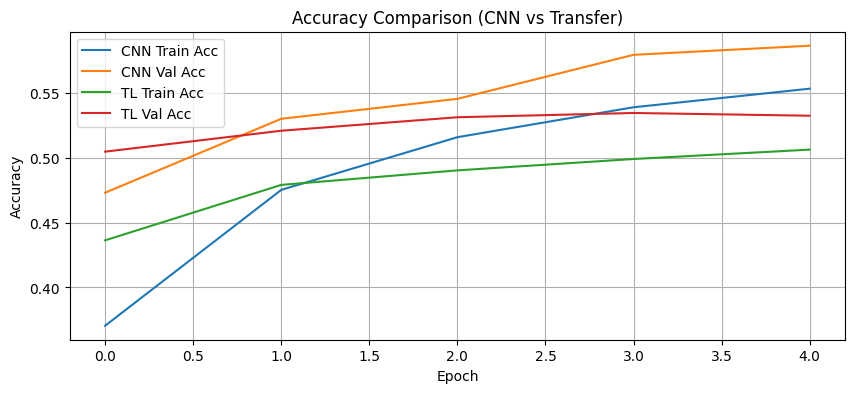

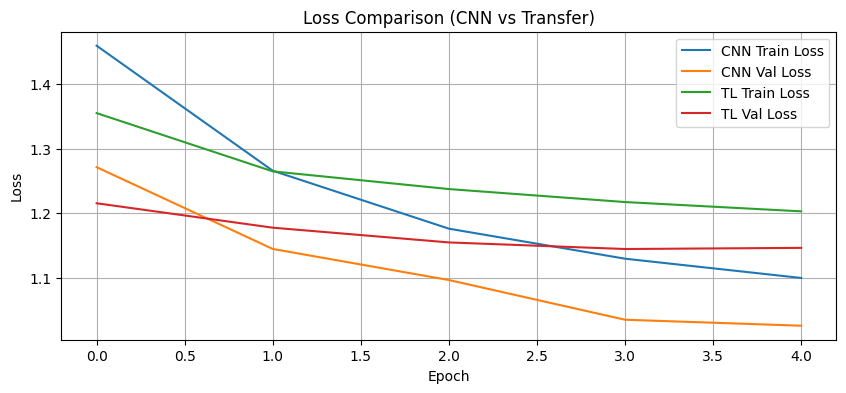

In [11]:
import matplotlib.pyplot as plt

# ================================
# ACCURACY
# ================================
plt.figure(figsize=(10,4))

plt.plot(history_cnn.history['accuracy'], label='CNN Train Acc')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Val Acc')

plt.plot(history_tl.history['accuracy'], label='TL Train Acc')
plt.plot(history_tl.history['val_accuracy'], label='TL Val Acc')

plt.title('Accuracy Comparison (CNN vs Transfer)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


# ================================
# LOSS
# ================================
plt.figure(figsize=(10,4))

plt.plot(history_cnn.history['loss'], label='CNN Train Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Val Loss')

plt.plot(history_tl.history['loss'], label='TL Train Loss')
plt.plot(history_tl.history['val_loss'], label='TL Val Loss')

plt.title('Loss Comparison (CNN vs Transfer)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
